# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# nothing to store
import pandas as pd
import geopandas as gpd
import earthpy
import os
import pathlib
import pygbif.occurrences as occ
import pygbif.species as species
# Remember to turn on line numbers under settings
# Remember to turn on wrap text for code cells. This is called word wrap in vscode under settings
# May need to backup and sync these settings and login again

c:\Users\kayle\miniconda3\envs\earth-analytics-python\Lib\site-packages\earthpy\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [2]:
# fixing earthpy version
id = 'eda'
project_title = 'Timberdoodle_Migration'
species_name = 'American_Woodcock'
species_lookup = 'Scolopax_minor'
year = 2022
gbif_filename = 'gbif_woodcock.csv'
ecoregions_dir = 'ecoregions'
plot_filename = 'woodcock_migration'
plot_height = 800


## STEP 1: Create a directory for your data

For this challenge, you will need to download some data to the computer
you’re working on. We suggest using the `earthpy` library we develop to
manage your downloads, since it encapsulates many best practices as far
as:

1.  Where to store your data
2.  Dealing with archived data like .zip files
3.  Avoiding version control problems
4.  Making sure your code works cross-platform
5.  Avoiding duplicate downloads

If you’re working on one of our assignments through GitHub Classroom, it
also lets us build in some handy defaults so that you can see your data
files while you work.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>project_title</code> with the actual project title,
Veery Migration 2023</li>
<li>Replace <code>'your-project-directory-name-here'</code> with a
<strong>descriptive</strong> name</li>
<li>The code should have printed out the path to your data files. Check
that your data directory exists and has data in it using the terminal or
your Finder/File Explorer.</li>
</ol></div></div>

> **File structure**
>
> These days, a lot of people find your file by searching for them or
> selecting from a `Bookmarks` or `Recents` list. Even if you don’t use
> it, your computer also keeps files in a **tree** structure of folders.
> Put another way, you can organize and find files by travelling along a
> unique **path**, e.g. `My Drive` \> `Documents` \>
> `My awesome project` \> `A project file` where each subsequent folder
> is **inside** the previous one. This is convenient because all the
> files for a project can be in the same place, and both people and
> computers can rapidly locate files they want, provided they remember
> the path.
>
> You may notice that when Python prints out a file path like this, the
> folder names are **separated** by a `/` or `\` (depending on your
> operating system). This character is called the **file separator**,
> and it tells you that the next piece of the path is **inside** the
> previous one.

In [10]:
# Define data directory
data_dir = os.path.join(

    ### home directory
    pathlib.Path.home(),
    ### data directory on local computer
    'Desktop',
    'earth-analytics',
    '03-migration-kward-alt',
    'data'
    )
# make the directory
os.makedirs(data_dir, exist_ok = True)
print(data_dir)

# Define GBIF data directory
colopax_minor_dir = os.path.join(data_dir, 'colopax_minor_gbif')

# Make the sub-directory
os.makedirs(colopax_minor_dir, exist_ok = True)

print(colopax_minor_dir)

C:\Users\kayle\Desktop\earth-analytics\03-migration-kward-alt\data
C:\Users\kayle\Desktop\earth-analytics\03-migration-kward-alt\data\colopax_minor_gbif


## STEP 2: Define your study area – the ecoregions of North America

Your sample data package included a Shapefile of global **ecoregions**.
You should be able to see changes in the number of observations of Veery
thrush in each ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-info"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div></div><div class="callout-body-container callout-body"><p>You don’t have to use ecoregions to group species observations – you
could choose to use political boundaries like countries or states, other
natural boundaries like watersheds, or even uniform hexagonal areas as
is common in conservation work. We chose ecoregions because we expect
the suitability for a species at a particular time of year to be
relatively consistent across the region.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
</ol></div></div>

INFO:Created 847 records


                                                 Ecoregion_name  \
Ecoregion_ID                                                      
1.0                                          Adelie Land tundra   
2.0                      Admiralty Islands lowland rain forests   
3.0           Aegean and Western Turkey sclerophyllous and m...   
4.0                                Afghan Mountains semi-desert   
5.0                            Ahklun and Kilbuck Upland Tundra   

              Ecoregion_area  \
Ecoregion_ID                   
1.0                 0.038948   
2.0                 0.170599   
3.0                13.844952   
4.0                 1.355536   
5.0                 8.196573   

                                                       geometry  
Ecoregion_ID                                                     
1.0           MULTIPOLYGON (((158.7141 -69.60657, 158.71264 ...  
2.0           MULTIPOLYGON (((147.28819 -2.57589, 147.2715 -...  
3.0           MULTIPOLYGON (((26.88659 35

<Axes: >

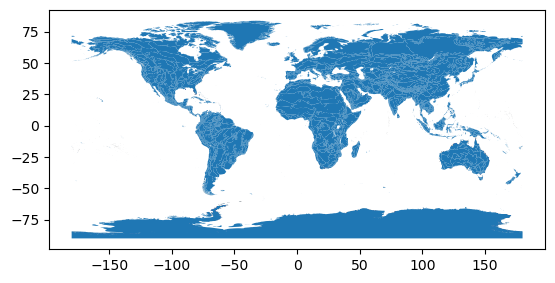

In [6]:
# Open up the ecoregions boundaries into python
# Download and save ecoregion boundaries from the EPA
# Update gdf var to ecoregion_url_download so it is easy to know what this variable is
ecoregion_url_download = ("https://storage.googleapis.com/teow2016/Ecoregions2017.zip")

# Before plotting I need to have data path to save the data
# The data is a shapefile
# The path should be in the directory specified above, reuse appropriate code
# Note--> If you cannot remember variables, quickly go to the terminal tray and then click the tab for jupyter to see which variables have already been created.

ecoregion_dir = os.path.join(data_dir, 'epa_ecoregions')
os.makedirs(ecoregion_dir, exist_ok=True)
ecoregion_path = os.path.join(ecoregion_dir, 'epa_eco.shp')

# Now that I have a path for the EPA ecoregions data, I can download it.
# WARNING only download this data once WARNING
# In the below code, gdf means the dataframe

if not os.path.exists(ecoregion_path):
    gdf = gpd.read_file(ecoregion_url_download)
    gdf.to_file(ecoregion_path)

# Map plotted fine (blue world map), now restart the kernel and re rerun the code with the following:
# Note: print crashed the kernel for some reason so skip print. Open the file on PC to see column names 
# Original columns named "OBJECTID" "ECO_NAME" "SHAPE_AREA" and "geometry"
# Rename these so they are easier to specify in code later if I do any masking

# Rename EPA ecoregion data--Use the new ecoregion_path code for the read.file function not the ecoregion_url_download var
# Don't use this code and just relabel columns instead [ecoregion_gdf = (gpd.read_file(ecoregion_url_download)
]ecoregion_gdf = gdf[['OBJECTID', 'ECO_NAME', 'SHAPE_AREA', 'geometry']].rename(columns={
                'OBJECTID': 'Ecoregion_ID',
                'ECO_NAME': 'Ecoregion_name',
                'SHAPE_AREA': 'Ecoregion_area'}).set_index('Ecoregion_ID') 

# Second try on showing the EPA data using gdf variable. Limit display to 5. 
# There are manyyyyyyyy EPA ecoregions in the USA see: https://en.wikipedia.org/wiki/List_of_ecoregions_in_the_United_States_(EPA) 

print(ecoregion_gdf.head(5))

# Plot the ecoregions quickly to check download
ecoregion_gdf.plot()


## STEP 3: Load species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

Let’s start by looking at a little of the raw data.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load GBIF data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Look at the beginning of the file you downloaded using the code
below. What do you think the <strong>delimiter</strong> is?</li>
<li>Run the following code cell. What happens?</li>
<li>Uncomment and modify the parameters of <code>pd.read_csv()</code>
below until your data loads successfully and you have only the columns
you want.</li>
</ol></div></div>

You can use the following code to look at the beginning of your file:

In [11]:
# I am using the American Woodcock aka Timberdoodle aka Scolopax Minor
# Use the new file provided on Canvas
# File name gbif-data-download.ipynb
# Don't use the original code as earthpy does not recognize project

gbif_path = os.path.join(colopax_minor_dir, "0043459-251025141854904.csv")
print(gbif_path)

# Load the GBIF data
gbif_df = pd.read_csv(
    gbif_path, 
    delimiter='\t',
    index_col='gbifID',
    usecols=['gbifID', 'decimalLatitude', 'decimalLongitude', 'month']
)
gbif_df.head(5)

C:\Users\kayle\Desktop\earth-analytics\03-migration-kward-alt\data\colopax_minor_gbif\0043459-251025141854904.csv


,decimalLatitude,decimalLongitude,month
gbifID,,,
5888822924,41.496560,-81.688060,11
5840393037,45.117718,-79.721486,6
5837911285,41.695688,-72.225632,6
5830767253,43.782676,-79.376178,3
5830714097,44.321570,-80.935598,11


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [12]:
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df, 
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude, 
            gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month', 'geometry']]
)
gbif_gdf

,month,geometry
gbifID,,
5888822924,11,POINT (-81.68806 41.49656)
5840393037,6,POINT (-79.72149 45.11772)
5837911285,6,POINT (-72.22563 41.69569)
5830767253,3,POINT (-79.37618 43.78268)
5830714097,11,POINT (-80.9356 44.32157)
...,...,...
3456260597,1,POINT (-98.13438 26.2915)
3456017787,1,POINT (-75.46564 39.94896)
3455832933,1,POINT (-75.48484 39.29049)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="f1412915" class="cell" data-execution_count="14">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [13]:
%store gbif_gdf ecoregion_gdf

Stored 'gbif_gdf' (GeoDataFrame)
Stored 'ecoregion_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!